In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sagemaker
from sklearn.model_selection import train_test_split
import boto3

sagemaker.config INFO - Not applying SDK defaults from location: C:\ProgramData\sagemaker\sagemaker\config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: C:\Users\ksshh\AppData\Local\sagemaker\sagemaker\config.yaml


In [2]:
sm_boto3 = boto3.client("sagemaker")
sess = sagemaker.Session()
region = "ap-south-1"
bucket = "your-s3-bucket-name" #EDIT
print('bucket name : ' + bucket)

bucket name : your-s3-bucket-name


In [6]:
df = pd.read_csv("Downloads/mobile_price_range_data.csv")

In [7]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df.shape

(2000, 21)

<Axes: xlabel='price_range', ylabel='count'>

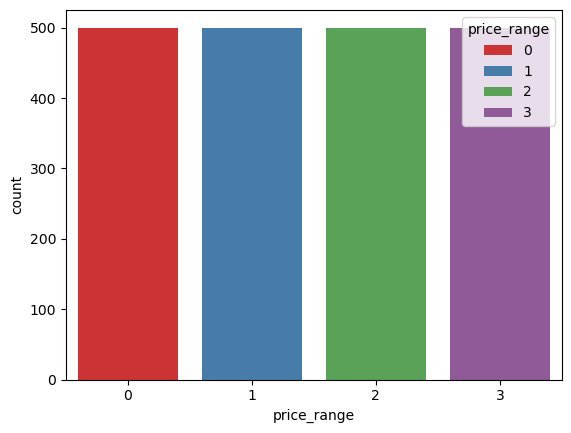

In [9]:
sns.countplot(x= 'price_range',hue = 'price_range', data = df, palette='Set1')

In [10]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [14]:
features = list(df.columns)

In [15]:
label = features.pop(-1)

In [16]:
label

'price_range'

In [17]:
features

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [18]:
x = df[features]
y = df[label]

In [19]:
y.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [20]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.15, random_state = 21)

In [22]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1700, 20)
(1700,)
(300, 20)
(300,)


In [23]:
trainX = X_train
trainX[label] = Y_train
testX = X_test
testX[label] = Y_test

In [24]:
print(trainX.shape)
print(testX.shape)

(1700, 21)
(300, 21)


In [25]:
trainX.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1465,510,0,2.6,0,0,0,33,0.1,110,6,...,1052,1897,1693,6,2,5,0,1,0,1
1095,775,1,2.5,1,1,1,10,0.1,185,7,...,444,1555,1719,19,3,18,1,1,1,1
995,1456,0,1.6,1,5,0,49,0.2,193,3,...,1285,1427,3624,12,11,16,1,1,0,3
335,803,0,0.8,1,0,0,18,0.3,106,4,...,627,935,2801,18,15,12,0,1,0,2
1804,1702,1,2.3,1,12,1,47,0.6,107,2,...,1284,1643,595,10,0,19,1,0,1,1


In [26]:
trainX.to_csv('train_v1.csv', index = False)
testX.to_csv('test_v1.csv', index = False)

In [85]:
sk_prefix = "sagemaker/mobile_price_classification_sklearn"
trainpath = sess.upload_data(path = "train_v1.csv", key_prefix = sk_prefix, bucket = bucket)
testpath = sess.upload_data(path = "test_v1.csv", key_prefix = sk_prefix, bucket = bucket)

In [27]:
print(trainpath)
print(testpath)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 print(trainpath)                                                                             │
│   2 print(testpath)                                                                              │
│   3                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'trainpath' is not defined

In [28]:
%%writefile script.py

import argparse
import os
import pandas as pd
import joblib
import boto3
import pathlib
from io import StringIO

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

def model_fn(model_dir):
    """Deserialize and return fitted model."""
    model = joblib.load(os.path.join(model_dir, "model.joblib"))
    return model

if __name__ == "__main__":
    # SageMaker containers pass hyperparameters as arguments
    parser = argparse.ArgumentParser()
    
    parser.add_argument('--n-estimators', type=int, default=100)
    parser.add_argument('--max-depth', type=int, default=None)
    parser.add_argument('--random-state', type=int, default=42)

    # SageMaker specific arguments
    parser.add_argument('--output-data-dir', type=str, default=os.environ.get('SM_OUTPUT_DATA_DIR'))
    parser.add_argument('--model-dir', type=str, default=os.environ.get('SM_MODEL_DIR'))
    parser.add_argument('--train', type=str, default=os.environ.get('SM_CHANNEL_TRAIN'))
    parser.add_argument('--test', type=str, default=os.environ.get('SM_CHANNEL_TEST'))
    parser.add_argument('--train-file', type=str, default="train_v1.csv")
    parser.add_argument('--test-file', type=str, default="test_v1.csv")

    args = parser.parse_args()

    train_df = pd.read_csv(os.path.join(args.train, args.train_file))
    test_df = pd.read_csv(os.path.join(args.test, args.test_file))
    
    features = list(train_df.columns)
    labels = features.pop(-1)

    print("Building training and testing data")
    X_train = train_df[features]
    X_test = test_df[features]
    Y_train = train_df[labels]
    Y_test = test_df[labels]
    
    # Train the model
    model = RandomForestClassifier(
        n_estimators=args.n_estimators,
        max_depth=args.max_depth,
        random_state=args.random_state
    )
    model.fit(X_train, Y_train)

    # Evaluate model
    preds = model.predict(X_test)
    acc = accuracy_score(Y_test, preds)
    test_rep = classification_report(Y_test, preds)
    print(f"Validation Accuracy: {acc}")
    print(f"Classification Report: {test_rep}")

    # Save model
    joblib.dump(model, os.path.join(args.model_dir, "model.joblib"))


Overwriting script.py


In [93]:
#training the model

import boto3
import sagemaker
from sagemaker.sklearn.estimator import SKLearn

region = "ap-south-1"

boto_session = boto3.Session(region_name=region)
sagemaker_session = sagemaker.Session(boto_session=boto_session)

role = "your IAM with AmazonSageMaker-ExecutionRole"  #EDIT # or specify your IAM role directly
region = "ap-south-1"

sklearn_estimator = SKLearn(
    entry_point="script.py",                  # your script from earlier
    role=role,
    instance_count = 1,
    instance_type="ml.m5.large",
    framework_version="1.0-1",                # Use a compatible version
    py_version="py3",
    sagemaker_session=sagemaker_session,
    hyperparameters={
        "n-estimators": 100,
        "random-state": 0
    }
)

# Start training
sklearn_estimator.fit({"train": trainpath, "test": testpath}, wait = True)

INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:sagemaker.telemetry.telemetry_logging:SageMaker Python SDK will collect telemetry to help us better understand our user's needs, diagnose issues, and deliver additional features.
To opt out of telemetry, please disable via TelemetryOptOut parameter in SDK defaults config. For more information, refer to https://sagemaker.readthedocs.io/en/stable/overview.html#configuring-and-using-defaults-with-the-sagemaker-python-sdk.
INFO:sagemaker:Creating training-job with name: sagemaker-scikit-learn-2025-05-04-11-08-11-952


2025-05-04 11:08:12 Starting - Starting the training job...
2025-05-04 11:08:34 Starting - Preparing the instances for training...
2025-05-04 11:09:20 Downloading - Downloading the training image......
2025-05-04 11:10:20 Training - Training image download completed. Training in progress..2025-05-04 11:10:25,087 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2025-05-04 11:10:25,090 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-05-04 11:10:25,094 sagemaker-training-toolkit INFO     No Neurons detected (normal if no neurons installed)
2025-05-04 11:10:25,111 sagemaker_sklearn_container.training INFO     Invoking user training script.
2025-05-04 11:10:25,361 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-05-04 11:10:25,365 sagemaker-training-toolkit INFO     No Neurons detected (normal if no neurons installed)
2025-05-04 11:10:25,383 sagemaker-training-toolkit INFO    

#s3 location where trained model is storerd - s3://sagemaker-ap-south-1-190219742690/sagemaker-scikit-learn-2025-05-04-11-08-11-952/output/model.tar.gz 
# can directly copy from bucket also

In [ ]:
#to get the model_data path using code
sklearn_estimator.latest_training_job.wait(logs = False)
artifact = sm_boto3.describe_training_job(
    TrainingJobName = sklearn_estimator.latest_training_job.name
    )["ModelArtifacts"]["S3ModelArtifacts"]

print("Model artifact at : " + artifact)

In [29]:
import boto3
import sagemaker

# ✅ Force region to ap-south-1
region = "ap-south-1"
boto_session = boto3.Session(region_name=region)
sagemaker_session = sagemaker.Session(boto_session=boto_session)

# Creating another folder with the trained model by copying the previous model

from sagemaker.sklearn.estimator import SKLearnModel
from time import gmtime, strftime

model_name = "Custom-sklearn-model-" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
model = SKLearnModel(name = model_name,
                     model_data = "created-model-link or use the artifact from above ", #EDIT
                     role = "your IAM with AmazonSageMaker-ExecutionRole", #EDIT
                     framework_version="1.0-1",
                     sagemaker_session = sagemaker_session,
                     entry_point="script.py")

In [30]:
endpoint_name = "Custom-sklearn-model-" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print(f"EndPoint Name : {endpoint_name}")

predictor = model.deploy(
    initial_instance_count = 1,
    instance_type = "ml.m4.xlarge",
    endpoint_name = endpoint_name,)

#this created endpoint is basically an API, takes input and provides output using predictor.predict

EndPoint Name : Custom-sklearn-model-2025-05-04-14-20-39
---------!

In [33]:
endpoint_name

'Custom-sklearn-model-2025-05-04-14-20-39'

In [34]:
predictor

In [41]:
trainX[features][2:5].values.tolist()

[[1456.0,
  0.0,
  1.6,
  1.0,
  5.0,
  0.0,
  49.0,
  0.2,
  193.0,
  3.0,
  20.0,
  1285.0,
  1427.0,
  3624.0,
  12.0,
  11.0,
  16.0,
  1.0,
  1.0,
  0.0],
 [803.0,
  0.0,
  0.8,
  1.0,
  0.0,
  0.0,
  18.0,
  0.3,
  106.0,
  4.0,
  1.0,
  627.0,
  935.0,
  2801.0,
  18.0,
  15.0,
  12.0,
  0.0,
  1.0,
  0.0],
 [1702.0,
  1.0,
  2.3,
  1.0,
  12.0,
  1.0,
  47.0,
  0.6,
  107.0,
  2.0,
  19.0,
  1284.0,
  1643.0,
  595.0,
  10.0,
  0.0,
  19.0,
  1.0,
  0.0,
  1.0]]

In [43]:
print(predictor.predict(trainX[features][2:5].values.tolist()))

[3 2 1]


In [ ]:
#good practice to delete the endpoint once done experimenting to avoid misuse
sm_boto3.delete_endpoint(Endpoint_name = endpoint_name)